In [45]:
%matplotlib inline

import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


from statsmodels.graphics.api import qqplot

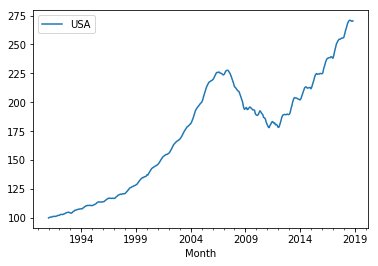

In [35]:
hpi = pd.read_csv('./data/FHFA_USA_NSA_HPI.csv')

hpi.Month = pd.to_datetime(hpi.Month)

hpi = hpi.set_index('Month')

hpi.plot()

In [46]:
hpi.head()

,USA
Month,
1991-01-01,100.00
1991-02-01,100.41
1991-03-01,100.73
1991-04-01,100.71
1991-05-01,100.87


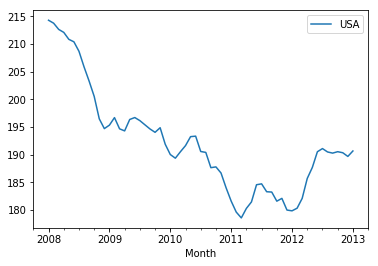

In [50]:
hpi_crisis = hpi.loc['20080101':'20130101'].copy()

hpi_crisis.plot()

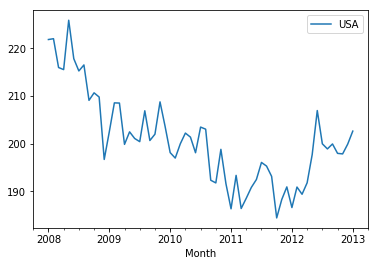

In [57]:
#Add Some Random Noise
hpi_crisis.USA = hpi_crisis.loc[:,'USA'] + np.random.rand(len(hpi_crisis), ) * 10

hpi_crisis.plot()

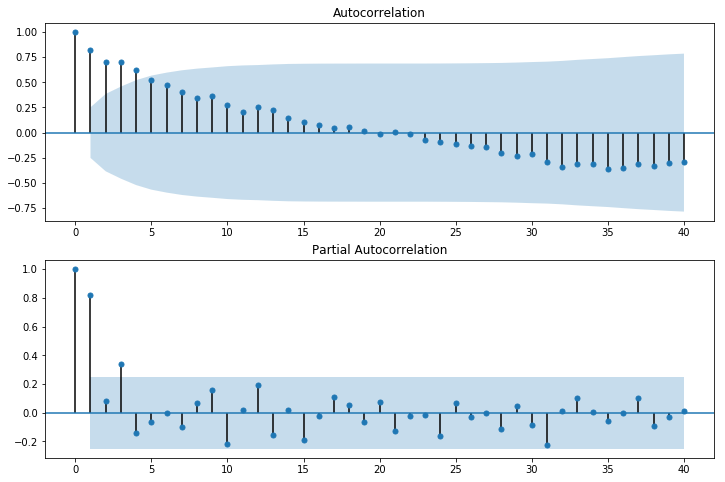

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(hpi_crisis.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(hpi_crisis, lags=40, ax=ax2)

In [64]:
sm.tsa.ARIMA?

In [98]:
hpi_arima = sm.tsa.ARIMA(hpi_crisis, (3,0,1)).fit()

/home/porch/anaconda3/envs/PyDataScience/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/porch/anaconda3/envs/PyDataScience/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [99]:
hpi_arima.params

const        205.399479
ar.L1.USA      0.377571
ar.L2.USA      0.089110
ar.L3.USA      0.453467
ma.L1.USA      0.368996
dtype: float64

In [100]:

hpi_arima.forecast(steps = 8)

/home/porch/anaconda3/envs/PyDataScience/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(array([201.56186143, 201.20890885, 202.21811182, 202.08463366,
        201.96411437, 202.36435545, 202.44420731, 202.45537115]),
 array([4.37667477, 5.46183978, 5.69808119, 6.3885769 , 6.94239214,
        7.23019884, 7.59168275, 7.92841574]),
 array([[192.98373651, 210.13998636],
        [190.5038996 , 211.9139181 ],
        [191.05007792, 213.38614572],
        [189.56325303, 214.60601429],
        [188.35727581, 215.57095292],
        [188.19342612, 216.53528478],
        [187.56478254, 217.32363209],
        [186.91596185, 217.99478045]]))

/home/porch/anaconda3/envs/PyDataScience/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


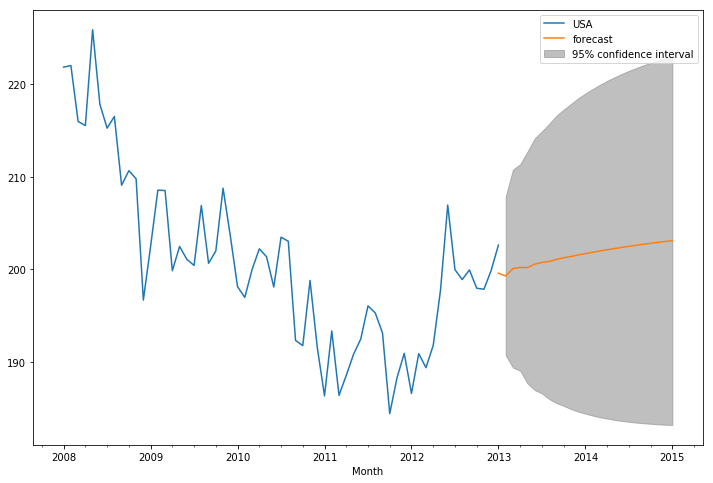

In [101]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = hpi_crisis.plot(ax=ax)
fig = hpi_arima.plot_predict('20130101', '20150101', dynamic=True, ax=ax, plot_insample=False)